<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/07_dimensional%20reduce/07_tse_pca_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

#  Dimensionality reduce -t-SNE method

A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```
To update to the latest version of the scikit-learn library, use the command below:
```
!pip install --upgrade scikit-learn
```

### Contents:
1. [Import libraries](#0)
2. [Data generation ](#1)
3. [Data visualisation](#2)
4. [Standarization](#3)
5. [PCA](#4)
6. [t-SNE](#5)
7. [PCA vs t-SNE](#6)
8. [50 components](#7)



### <a name='0'></a> Import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from keras.datasets import mnist



### <a name='1'></a> Data generation

In [2]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'y_test shape:{y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape:(60000, 28, 28)
y_train shape:(60000,)
X_test shape:(10000, 28, 28)
y_test shape:(10000,)


Visualisation a sample picture

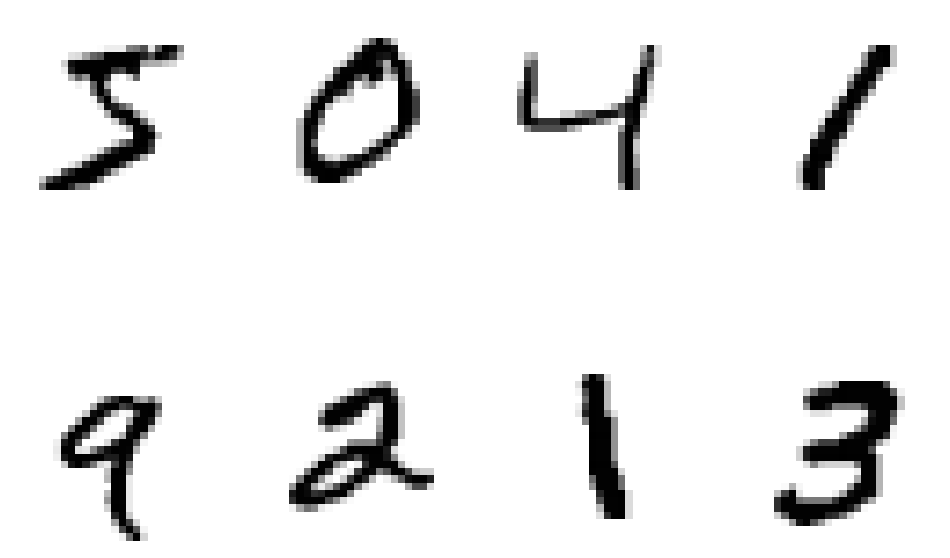

In [3]:

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
 #  plt.title(y_train[i], color='black', fontsize=17)- Appears 'str' error
    plt.axis('off')
plt.show()
     

In [4]:
#Cut  first 10000 pictures
X_train=X_train[:10000]
y_train=y_train[:10000]
#Flatten a pictures

X_train=X_train.reshape(-1,28*28)
X_train.shape

(10000, 784)

### <a name='3'></a> Strandarization

In [20]:
#Standarisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)

### <a name='4'></a>PCA

In [21]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 3)

In [22]:
#Explained variance
results=pd.DataFrame(data={"explained_variance_ratio":pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results.head()

,explained_variance_ratio,cumulative,component
0,0.061640,0.061640,1
1,0.043662,0.105302,2
2,0.040458,0.145760,3


In [23]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()
     

In [24]:
X_train_pca_df=pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,-0.997683,-4.651893,-0.739416,5.0
1,8.682794,-7.123813,-4.195234,0.0
2,2.438963,10.566281,-4.058863,4.0
3,-7.291490,-3.686037,3.064604,1.0
4,-4.791456,4.498315,-5.603802,9.0


In [25]:
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5, width=950, 
           title='PCA - 2 components', template='plotly_dark')

In [26]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', opacity=0.5, width=950, title='PCA-3 components', template='plotly_dark')

### <a name='5'></a>t-SNE

In [29]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 5.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.770266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.063431
[t-SNE] KL divergence after 1000 iterations: 1.701723


In [34]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df.head()


,tsne_1,tsne_2,class
0,0.079117,-36.249866,5.0
1,72.154938,-6.226119,0.0
2,2.510867,77.577850,4.0
3,-62.612118,-7.332272,1.0
4,-22.198307,71.088943,9.0


In [35]:
#t_SNE visualization
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 2 components')


### <a name='6'></a>PCA vs.t_SNE comperision

In [39]:
from plotly.subplots import make_subplots
fig= make_subplots(rows=1, cols=2, subplot_titles=["PCA",'t-SNE'], horizontal_spacing=0.03)

fig1=px.scatter(X_train_pca_df, x='pca_1', y='pca_2',color='class', opacity=0.5 )
fig2=px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
for i in range(0,10):
  fig.add_trace(fig1['data'][i], row=1, col=1)
  fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(width=950, showlegend=False, template='plotly_dark')
fig.show()

### <a name='7'></a>50 components

In [51]:
pca=PCA(n_components=50)
X_train_pca=pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [52]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 0.838s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.896169
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.162384
[t-SNE] KL divergence after 1000 iterations: 1.647059


In [55]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

,tsne_1,tsne_2,class
0,10.836510,-41.821255,5.0
1,79.221878,0.642135,0.0
2,24.426826,47.055374,4.0
3,-80.986000,4.663151,1.0
4,-11.385876,57.672310,9.0
...,...,...,...
9995,-1.576398,-63.126869,5.0
9996,-10.813338,-4.409037,8.0
9997,27.619570,-62.753376,6.0
9998,-13.498553,52.300762,9.0


In [56]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700, template='plotly_dark', title='t-SNE- 2 components after PCA')

In [61]:
fig=make_subplots(rows=1, cols=3, subplot_titles=['PCA', 't-s-SNE', 't-SNE after PCA'], horizontal_spacing=0.03)

fig1=px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2=px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3=px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0,10):
  fig.add_trace(fig1['data'][i],row=1, col=1)
  fig.add_trace(fig2['data'][i],row=1, col=2)
  fig.add_trace(fig3['data'][i],row=1, col=3)
fig.update_layout(width=1000, height=500, showlegend=False, template='plotly_dark')
fig.show()


3 components

In [68]:
tsne=TSNE(n_components=3, verbose=1)
X_train_tse=tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 0.829s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.896169
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.347313
[t-SNE] KL divergence after 1000 iterations: 1.451612


In [70]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'tsne_3', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

ValueError: ignored

In [ ]:
px.scatter_3d(X_train_tsne_df, x='tsne_1', y='tsne_2', z='tsne_3', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 3 components'